In [1]:
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader
from pandas_datareader import data as wb
from pandas import Series, DataFrame

In [2]:
tickers = ['INTC', 'WMT']
data = pd.DataFrame()
for a in tickers:
    data[a] = wb.DataReader(a, data_source = 'iex', start = '2014-05-23')['close']

5y
5y


In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 2014-05-29 to 2019-05-28
Data columns (total 2 columns):
INTC    1258 non-null float64
WMT     1258 non-null float64
dtypes: float64(2)
memory usage: 29.5+ KB


In [5]:
data_df = DataFrame(data)

In [8]:
#data_df.to_csv('C:/Users/Naois/Documents/Udemy Resources/Python - Finance/Section 14 - Markowitz Portfolio/INTC_WMT_Data.csv')

In [6]:
data.head()

,INTC,WMT
date,,
2014-05-29,23.4281,66.5101
2014-05-30,23.7409,67.2016
2014-06-02,23.6888,67.1929
2014-06-03,24.0364,67.1491
2014-06-04,23.9842,67.5168


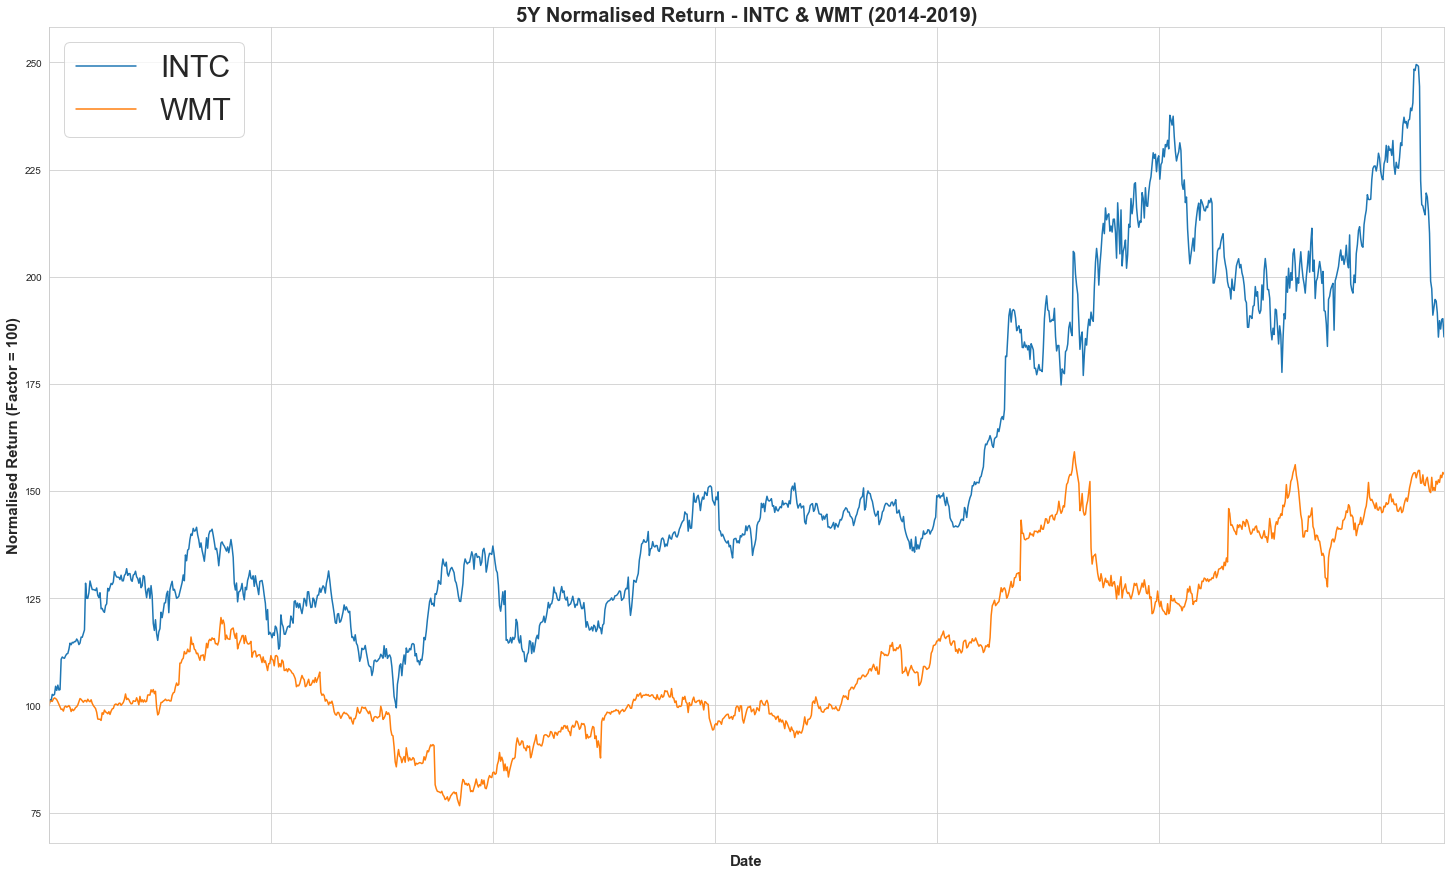

In [9]:
(data/data.iloc[0]*100).plot(legend = True, figsize = (25,15))
plt.legend(prop = {'size': 30})
plt.xlabel('Date', fontsize = 15, weight = 'bold')
plt.ylabel('Normalised Return (Factor = 100)', fontsize = 15, weight = 'bold')
plt.title('5Y Normalised Return - INTC & WMT (2014-2019)', fontsize = 20, weight = 'bold')
#plt.savefig('Normalised Returns - INTC & WMT.pdf')
plt.margins(x = 0)
plt.show()

In [10]:
logr = np.log(data/data.shift(1))
(logr.head())*100

,INTC,WMT
date,,
2014-05-29,NaN,NaN
2014-05-30,1.326314,1.034324
2014-06-02,-0.219694,-0.012947
2014-06-03,1.456699,-0.065207
2014-06-04,-0.217407,0.546094


In [11]:
avglr = logr.mean()*250
print(str(round(avglr,2)*100)+ '%')

INTC    12.0
WMT      9.0
dtype: float64%


In [12]:
logr.cov()*250

,INTC,WMT
INTC,0.066203,0.011873
WMT,0.011873,0.037856


In [13]:
logr.corr()

,INTC,WMT
INTC,1.000000,0.237168
WMT,0.237168,1.000000


In [14]:
num_assets = len(tickers)
num_assets

2

In [15]:
arr = np.random.random(2)                 #2 Random Weights
arr

array([0.35003108, 0.83002693])

In [16]:
arr[0] + arr[1]

1.18005800823225

In [17]:
weights = np.random.random(num_assets)
weights = weights/np.sum(weights)                 #'weights /=' is same as x += 2
weights

array([0.31902469, 0.68097531])

In [18]:
weights[0] + weights[1]

1.0

# Expected Portfolio Return

In [19]:
np.sum(weights * logr.mean())*250

0.09783802352718236

# Expected Portfolio Variance

In [37]:
np.dot(weights.T, np.dot(logr.cov()*250, weights))

0.02998999079874992

# Expected Portfolio Volatility

In [38]:
np.sqrt(np.dot(weights.T, np.dot(logr.cov()*250, weights)))

0.17317618427124995

# Efficient Frontier

In [39]:
pfolio_ret = []
pfolio_vol = []

for x in range(1000):                         #Generating 1000 distinct combinations of portfolios involving two securities 
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    pfolio_ret.append(np.sum(weights * logr.mean())*250)
    pfolio_vol.append(np.sqrt(np.dot(weights.T, np.dot(logr.cov()*250, weights))))


pfolio_ret = np.array(pfolio_ret)
pfolio_vol = np.array(pfolio_vol)

pfolio_ret, pfolio_vol

(array([0.10600653, 0.09764419, 0.09530395, 0.11300148, 0.11799916,
        0.11273039, 0.10831834, 0.10540878, 0.1117492 , 0.10745878,
        0.08976162, 0.1191123 , 0.1029132 , 0.11935775, 0.11035104,
        0.11417042, 0.096509  , 0.1169626 , 0.10835243, 0.12047986,
        0.1060688 , 0.10501043, 0.08940934, 0.09983942, 0.11426798,
        0.12168299, 0.09455746, 0.09873594, 0.09699071, 0.10991103,
        0.10981773, 0.10600046, 0.08700576, 0.10560837, 0.09854162,
        0.09688401, 0.10005791, 0.10225236, 0.08870547, 0.11251882,
        0.11850179, 0.10880738, 0.10423453, 0.10762803, 0.10497212,
        0.10712255, 0.10481818, 0.10822985, 0.10315213, 0.11752478,
        0.12175065, 0.10237796, 0.08842619, 0.08844088, 0.09453461,
        0.11047672, 0.08721044, 0.08810612, 0.10563312, 0.09815874,
        0.10320841, 0.09461107, 0.10146558, 0.10891058, 0.10700419,
        0.10747452, 0.11892644, 0.10895684, 0.10163399, 0.10909958,
        0.09295607, 0.09106064, 0.10233262, 0.08

In [40]:
portfolios = pd.DataFrame({'Return': pfolio_ret, 'Volatility': pfolio_vol})

In [41]:
portfolios.head()

,Return,Volatility
0,0.106007,0.181931
1,0.097644,0.171632
2,0.095304,0.172819
3,0.113001,0.205596
4,0.117999,0.228559


In [42]:
portfolios.tail()

,Return,Volatility
995,0.109346,0.191784
996,0.121894,0.248964
997,0.099463,0.171961
998,0.122337,0.251400
999,0.094654,0.173467


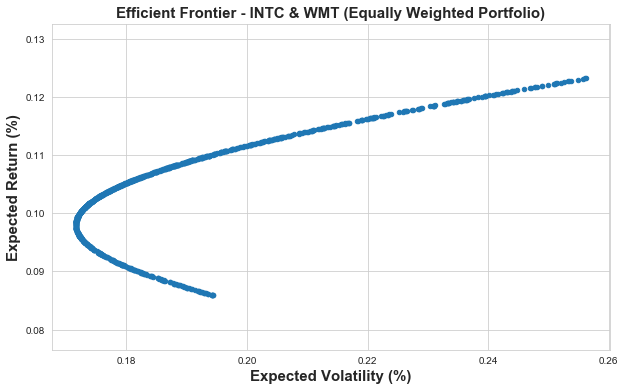

In [43]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10,6))
plt.xlabel('Expected Volatility (%)', fontsize = 15, weight = 'bold')
plt.ylabel('Expected Return (%)', fontsize = 15, weight = 'bold' )
plt.title('Efficient Frontier - INTC & WMT (Equally Weighted Portfolio)', fontsize = 15, weight = 'bold')
#plt.savefig('Efficient Frontier Plot.pdf')
plt.margins(x = 0)
plt.show()